### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
#Find the input columns and save it in a different variable
dataset_train = pd.read_csv('../rnn/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


### Feature Scaling

In [4]:
#There is 2 feature scaling type
#Normalization
#Standardization
#We'll use Normalization for this example
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Create a data structure

In [5]:
X_train = []
y_train = []
pd.set_option('display.max_rows', 1000)
#np.set_printoptions(threshold=np.inf, precision=3)
np.set_printoptions(threshold=np.inf, precision=3)
#np.set_printoptions() -> formatter gets reset
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0]) #from 0 to inclusive 59, 
    y_train.append(training_set_scaled[i,0])

#X_train contains first 60 days
#y_train contains the value of 120. day
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train

array([[8.581e-02, 9.701e-02, 9.433e-02, 9.156e-02, 7.984e-02, 6.433e-02,
        5.854e-02, 6.569e-02, 6.109e-02, 6.639e-02, 6.143e-02, 7.475e-02,
        2.798e-02, 2.379e-02, 2.409e-02, 1.592e-02, 1.079e-02, 9.673e-03,
        1.643e-02, 2.100e-02, 2.281e-02, 2.273e-02, 2.811e-02, 3.213e-02,
        4.338e-02, 4.476e-02, 4.790e-02, 4.407e-02, 4.649e-02, 4.746e-02,
        4.874e-02, 3.936e-02, 4.137e-02, 4.035e-02, 4.785e-02, 4.325e-02,
        4.357e-02, 4.286e-02, 4.602e-02, 5.398e-02, 5.739e-02, 5.715e-02,
        5.570e-02, 4.422e-02, 4.515e-02, 4.606e-02, 4.413e-02, 3.676e-02,
        4.487e-02, 5.065e-02, 5.214e-02, 5.612e-02, 5.819e-02, 6.541e-02,
        6.883e-02, 7.244e-02, 7.994e-02, 7.847e-02, 8.034e-02, 8.498e-02],
       [9.701e-02, 9.433e-02, 9.156e-02, 7.984e-02, 6.433e-02, 5.854e-02,
        6.569e-02, 6.109e-02, 6.639e-02, 6.143e-02, 7.475e-02, 2.798e-02,
        2.379e-02, 2.409e-02, 1.592e-02, 1.079e-02, 9.673e-03, 1.643e-02,
        2.100e-02, 2.281e-02, 2.273e-

In [7]:
y_train

array([8.628e-02, 8.472e-02, 7.454e-02, 7.884e-02, 7.238e-02, 6.663e-02,
       6.316e-02, 6.782e-02, 6.823e-02, 7.601e-02, 8.083e-02, 5.808e-02,
       4.468e-02, 4.422e-02, 4.202e-02, 4.070e-02, 3.017e-02, 3.512e-02,
       4.046e-02, 4.686e-02, 5.067e-02, 4.879e-02, 4.027e-02, 3.787e-02,
       4.567e-02, 4.225e-02, 3.213e-02, 4.187e-02, 4.308e-02, 4.878e-02,
       4.636e-02, 3.748e-02, 4.171e-02, 5.341e-02, 6.810e-02, 6.001e-02,
       3.722e-02, 4.920e-02, 3.828e-02, 4.524e-02, 3.769e-02, 3.287e-02,
       2.578e-02, 2.630e-02, 1.062e-02, 9.171e-03, 1.401e-02, 1.496e-02,
       2.526e-02, 1.438e-02, 2.212e-02, 8.743e-03, 1.284e-03, 8.929e-04,
       0.000e+00, 2.121e-03, 1.228e-02, 1.804e-02, 1.808e-02, 7.106e-03,
       6.492e-03, 2.251e-03, 6.827e-03, 5.153e-03, 1.356e-02, 1.990e-02,
       1.823e-02, 2.634e-02, 2.976e-02, 2.281e-02, 2.766e-02, 1.479e-02,
       6.288e-03, 1.096e-02, 1.486e-02, 1.678e-02, 1.542e-02, 2.392e-02,
       4.487e-02, 3.721e-02, 5.065e-02, 4.446e-02, 

### Reshaping

In [8]:
#Use reshape to add new dimension
#New dimension = new indicator, therefore prediction could be optimized

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#input shape, expected from rnn -> (batchsize, timesteps, inputdim), inputdim -> indicator number
#comparing the stock price of apple, samsung, xiaomi
X_train

array([[[8.581e-02],
        [9.701e-02],
        [9.433e-02],
        [9.156e-02],
        [7.984e-02],
        [6.433e-02],
        [5.854e-02],
        [6.569e-02],
        [6.109e-02],
        [6.639e-02],
        [6.143e-02],
        [7.475e-02],
        [2.798e-02],
        [2.379e-02],
        [2.409e-02],
        [1.592e-02],
        [1.079e-02],
        [9.673e-03],
        [1.643e-02],
        [2.100e-02],
        [2.281e-02],
        [2.273e-02],
        [2.811e-02],
        [3.213e-02],
        [4.338e-02],
        [4.476e-02],
        [4.790e-02],
        [4.407e-02],
        [4.649e-02],
        [4.746e-02],
        [4.874e-02],
        [3.936e-02],
        [4.137e-02],
        [4.035e-02],
        [4.785e-02],
        [4.325e-02],
        [4.357e-02],
        [4.286e-02],
        [4.602e-02],
        [5.398e-02],
        [5.739e-02],
        [5.715e-02],
        [5.570e-02],
        [4.422e-02],
        [4.515e-02],
        [4.606e-02],
        [4.413e-02],
        [3.67

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
#We're predicting continuous data, therefore -> Regression
regressor = Sequential()

In [11]:
hl_size = 50
regressor.add(LSTM(hl_size, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))# %20 of the neurons of the LSTM layer will be ignored during the training in forward
# and back propagation

In [12]:
# don't need to specify input_shape anymore
# cause it's already prespecified in first hidden layer
regressor.add(LSTM(hl_size, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(hl_size, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
#After this layer comes the output layer, so we don't have any return_sequence
regressor.add(LSTM(hl_size, return_sequences = False))
regressor.add(Dropout(0.2))

In [15]:
#Output_layer -> Stock price
regressor.add(Dense(units=1))

In [18]:
#Compile the RNN, optimizer and loss func.
#Adam or RMSprop
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [19]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 65ms/step - loss: 0.0399
Epoch 2/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

### Get the real stock price of 2017

In [21]:
dataset_test = pd.read_csv('../rnn/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price
#never scale the test(real) values

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [23]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [24]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [22]:
#concatination of training and test set but we have to be careful
#we will scale the concationation version but we need to keep same the actual test values
#we will scale just the inputs not the actual test values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) #train + test
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [31]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [32]:
inputs = inputs.reshape(-1,1) # make the inputs 3D

In [33]:
inputs = sc.transform(inputs) # scale the inputs

In [34]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0]) #from 0 to inclusive 59, 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test) # regressor model predict the outputs based on inputs 0-59, 1-60, 2-61, ...
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # inversing the transformed values to see real values

1/1 [==============================] - 1s 1s/step


### Visualising the results

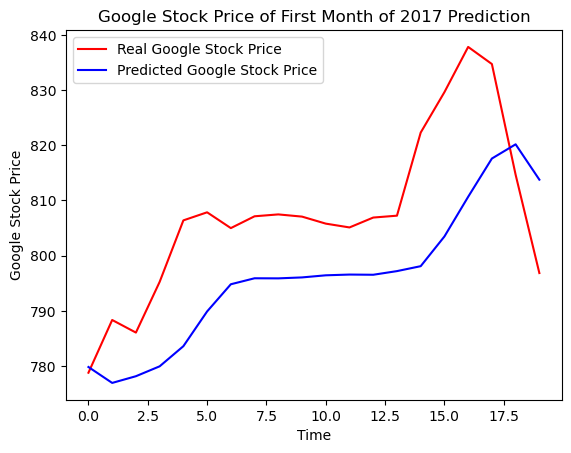

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price of First Month of 2017 Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
#Our model lagging behind the actual values, cause it cannot react too fast nonlinear changes
#future variation of the stock price are independent from the past,(macro-micro economics)
#our model reacts okay to smooth changes